# Problem 4

### a) Random input, compare variance

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import islice

In [4]:
# Function for Method 2
def method_2(line, m):
    k2_est = 0
    for item in line:
        num = random.random()
        if num < 1 / m:  # check with probability 1/m
            k2_est += item  # +item acts as indicator variable instead of actually checking
    return k2_est * m  # scale up by m to get estimate of total number of 1s

# Function for Method 4
def method_4(line, m):
    k4_est = 0
    blocks = line.reshape(-1, m)  # reshape the line into blocks of size m
    for block in blocks:
        choice = random.choice(block)  # choose one item from the block at random
        k4_est += choice  # again acts as indicator variable
    return k4_est * m  # scale up by m to get estimate of total number of 1s

In [5]:
n = 100
m = 10
k_values = np.arange(15, 26)
mc_runs = 1000
k2_ests = {k: [] for k in k_values}
k4_ests = {k: [] for k in k_values}

for k in k_values:
    for run in range(mc_runs):
        line = np.zeros(n)
        line[:k] = 1 # put in k faulty items

        np.random.shuffle(line) # randomize order (same for both methods)


        # METHOD 2

        k2_ests[k].append(method_2(line, m))

        #print(f"k2 estimate for k={k}: {k2_ests[k][-1]}")



        # METHOD 4

        k4_ests[k].append(method_4(line, m))

        #print(f"k4 estimate for k={k}: {k4_ests[k][-1]}")

In [6]:
k2_vars = [np.var(k2_ests[k], ddof=1) for k in k_values]
k4_vars = [np.var(k4_ests[k], ddof=1) for k in k_values]

k2_std_errs = [np.std(k2_ests[k], ddof=1) / np.sqrt(mc_runs) for k in k_values]
k4_std_errs = [np.std(k4_ests[k], ddof=1) / np.sqrt(mc_runs) for k in k_values]

k2_ci = 1.96 * np.array(k2_std_errs)
k4_ci = 1.96 * np.array(k4_std_errs)

### ** Claude did all plotting **

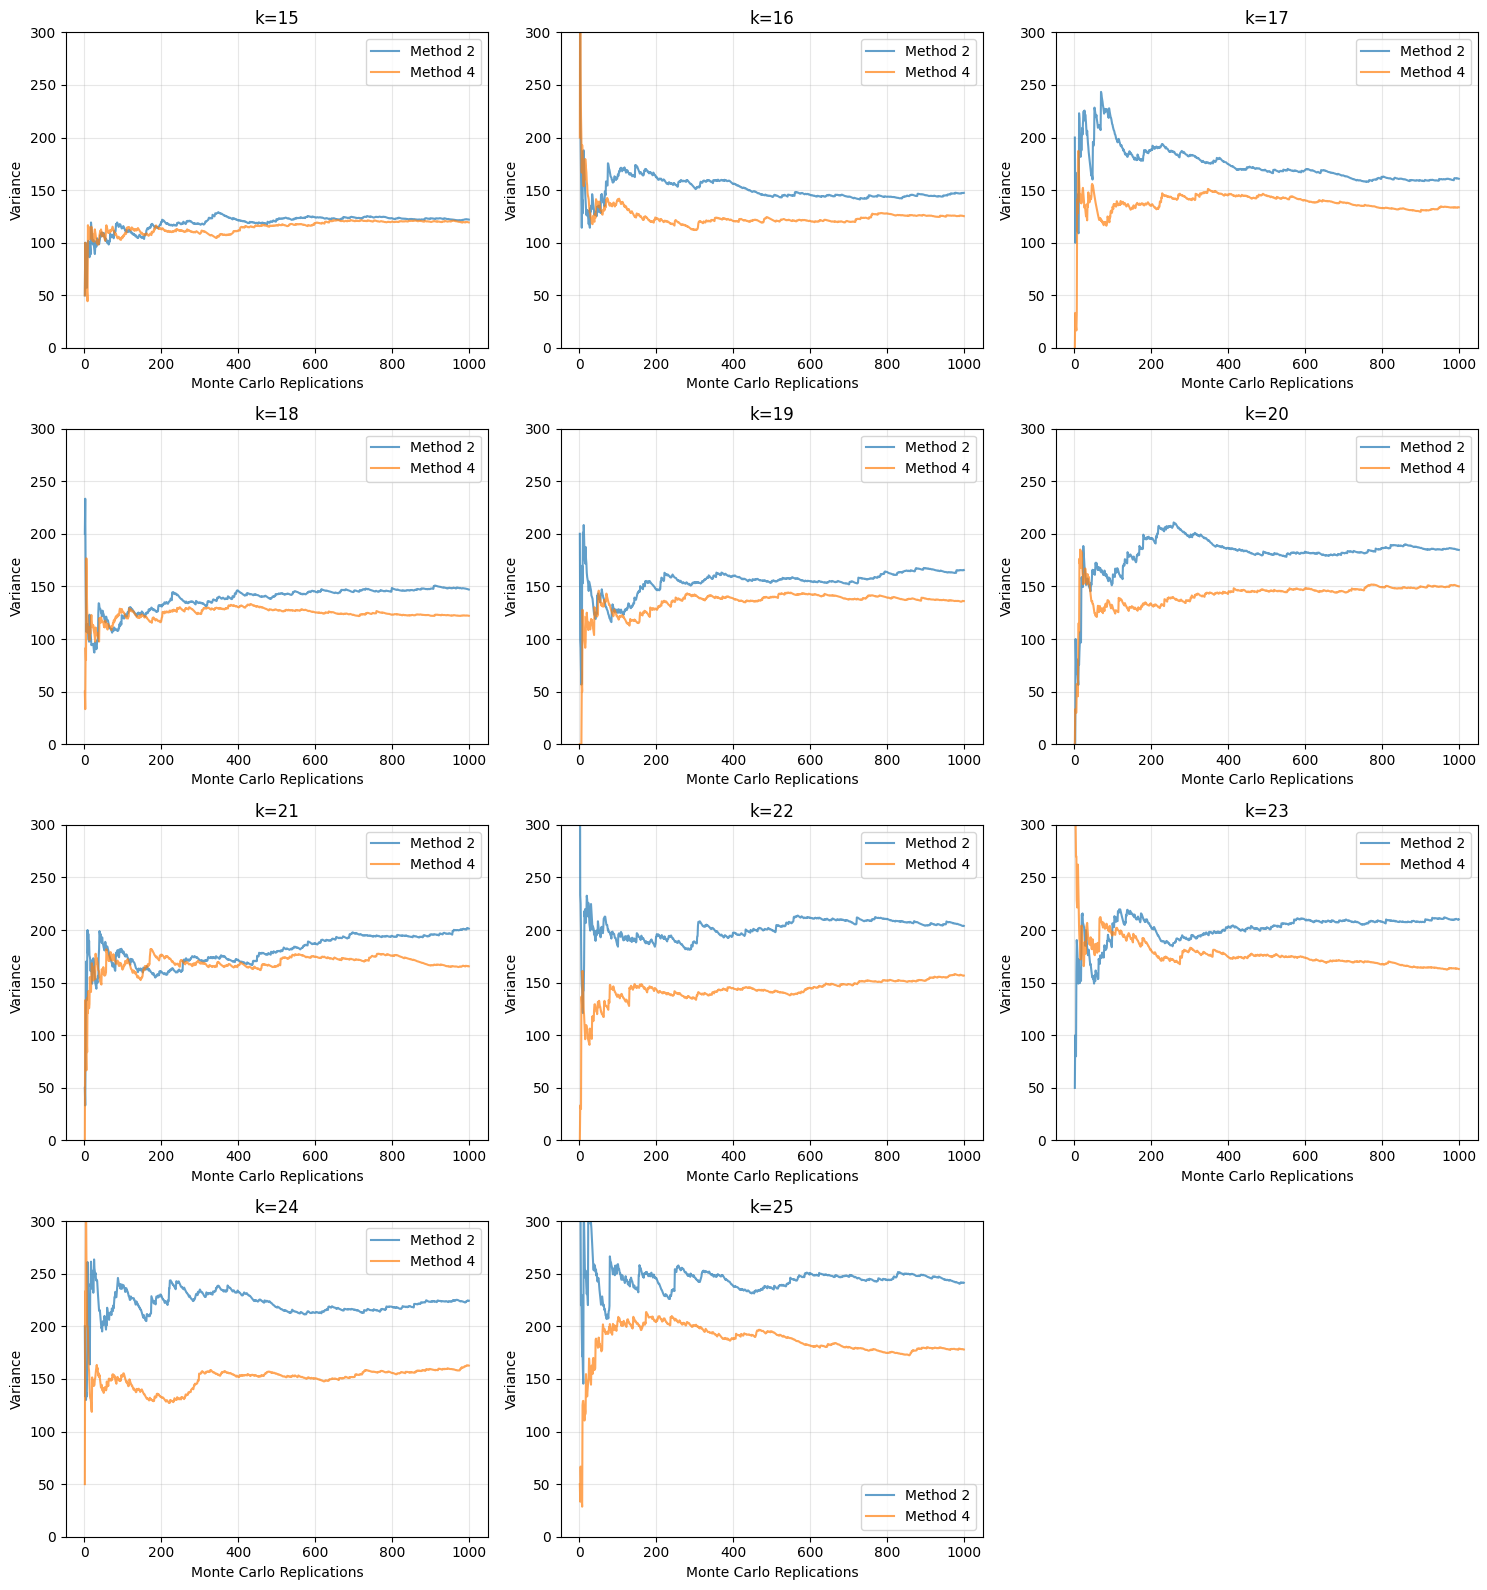

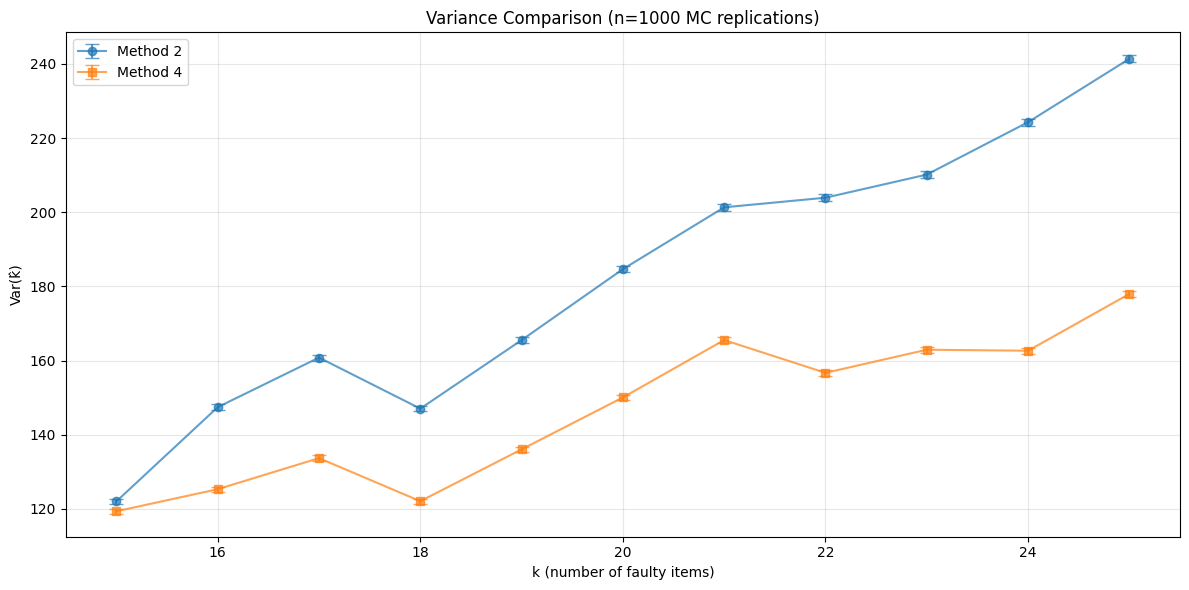


Variance Comparison:
k     Var(k̂₂)     Var(k̂₄)     Ratio (Var₂/Var₄)
--------------------------------------------------
15    122.02       119.34       1.02        
16    147.43       125.30       1.18        
17    160.80       133.68       1.20        
18    147.03       122.07       1.20        
19    165.52       136.05       1.22        
20    184.66       150.05       1.23        
21    201.34       165.53       1.22        
22    203.93       156.69       1.30        
23    210.17       162.92       1.29        
24    224.31       162.65       1.38        
25    241.39       177.98       1.36        


In [7]:
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    mc_reps = np.arange(2, mc_runs + 1) # start from 2 to avoid variance of a single estimate being zero (same below)
    
    # Cumulative variance estimates
    k2_cum_var = [np.var(k2_ests[k][:i], ddof=1) for i in range(2, mc_runs + 1)]
    k4_cum_var = [np.var(k4_ests[k][:i], ddof=1) for i in range(2, mc_runs + 1)]
    
    ax.plot(mc_reps, k2_cum_var, label='Method 2', alpha=0.7)
    ax.plot(mc_reps, k4_cum_var, label='Method 4', alpha=0.7)
    ax.set_title(f'k={k}')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Variance')
    ax.set_ylim(0, 300)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide the last subplot (we only have 11 values of k)
axes[11].axis('off')

plt.tight_layout()
plt.show()

# PLOT 2: Single plot with confidence intervals
plt.figure(figsize=(12, 6))

plt.errorbar(k_values, k2_vars, yerr=k2_ci, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=6)
plt.errorbar(k_values, k4_vars, yerr=k4_ci, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=6)

plt.xlabel('k (number of faulty items)')
plt.ylabel('Var(k̂)')
plt.title(f'Variance Comparison (n={mc_runs} MC replications)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nVariance Comparison:")
print(f"{'k':<5} {'Var(k̂₂)':<12} {'Var(k̂₄)':<12} {'Ratio (Var₂/Var₄)':<12}")
print("-" * 50)
for i, k in enumerate(k_values):
    ratio = k2_vars[i] / k4_vars[i] if k4_vars[i] > 0 else float('inf')
    print(f"{k:<5} {k2_vars[i]:<12.2f} {k4_vars[i]:<12.2f} {ratio:<12.2f}")

### b) Worst case, compare variance

In [8]:
K = 20
l_values = [2, 4, 5, 10]

k2_ests_b = {l: [] for l in l_values}
k4_ests_b = {l: [] for l in l_values}

for l in l_values:
    for run in range(mc_runs):
        blocks2 = np.zeros((n//m, m))
        blocks2[:l, :(K//l)] = 1 # put in K=20 faulty items in l blocks
        np.random.shuffle(blocks2) # shuffle order of blocks (same for both methods)

        line2 = blocks2.flatten() # flatten back to line format


        # METHOD 2

        k2_ests_b[l].append(method_2(line2, m))

        #print(f"k2 estimate for k={k}: {k2_ests[k][-1]}")



        # METHOD 4

        k4_ests_b[l].append(method_4(line2, m))

        #print(f"k4 estimate for k={k}: {k4_ests[k][-1]}")

In [9]:
k2_variances_b = [np.var(k2_ests_b[l], ddof=1) for l in l_values]
k4_variances_b = [np.var(k4_ests_b[l], ddof=1) for l in l_values]

k2_std_errors_b = [np.std(k2_ests_b[l], ddof=1) / np.sqrt(mc_runs) for l in l_values]
k4_std_errors_b = [np.std(k4_ests_b[l], ddof=1) / np.sqrt(mc_runs) for l in l_values]

k2_ci_b = 1.96 * np.array(k2_std_errors_b)
k4_ci_b = 1.96 * np.array(k4_std_errors_b)

C:\Users\kpolage\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:4268: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\kpolage\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


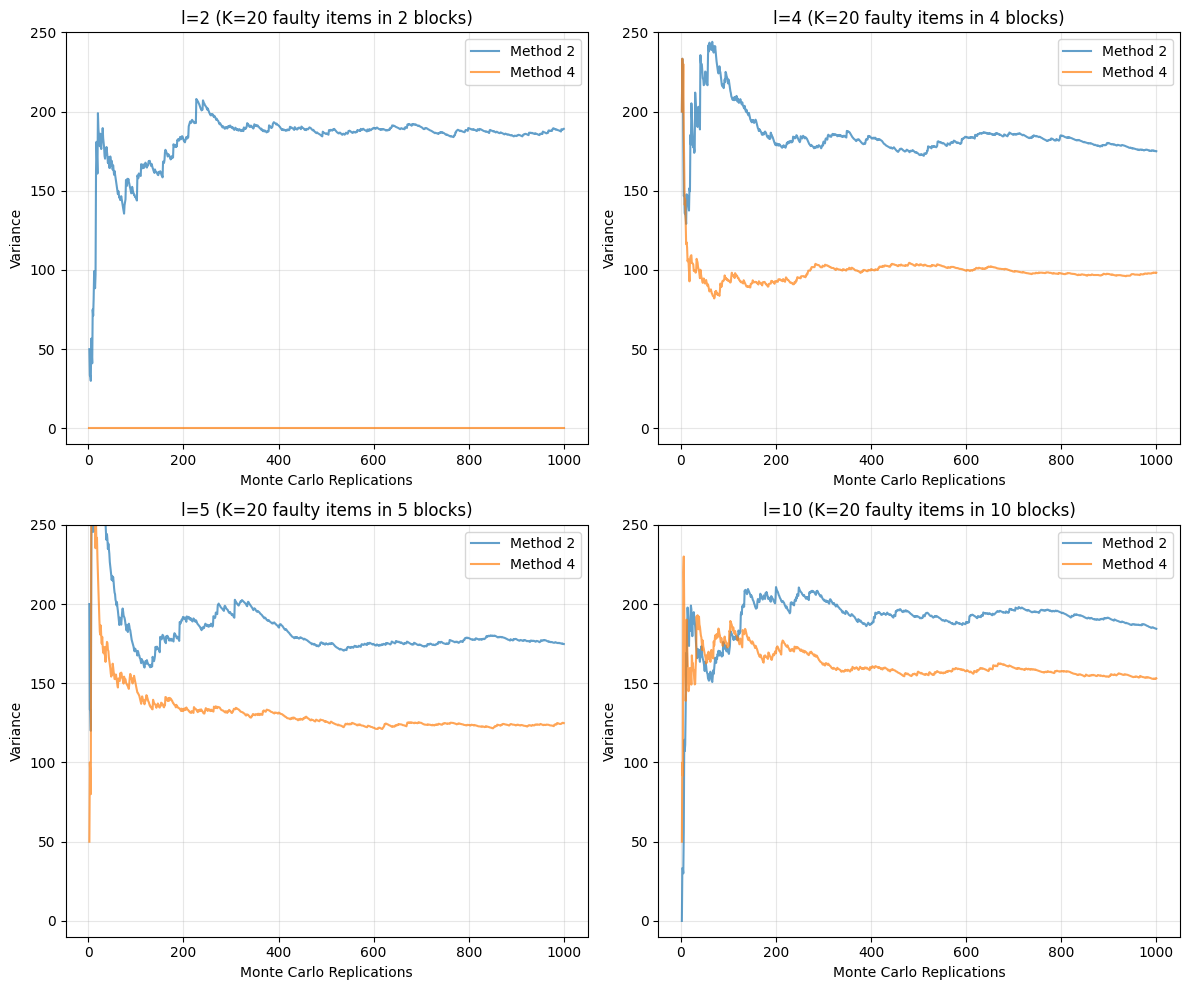

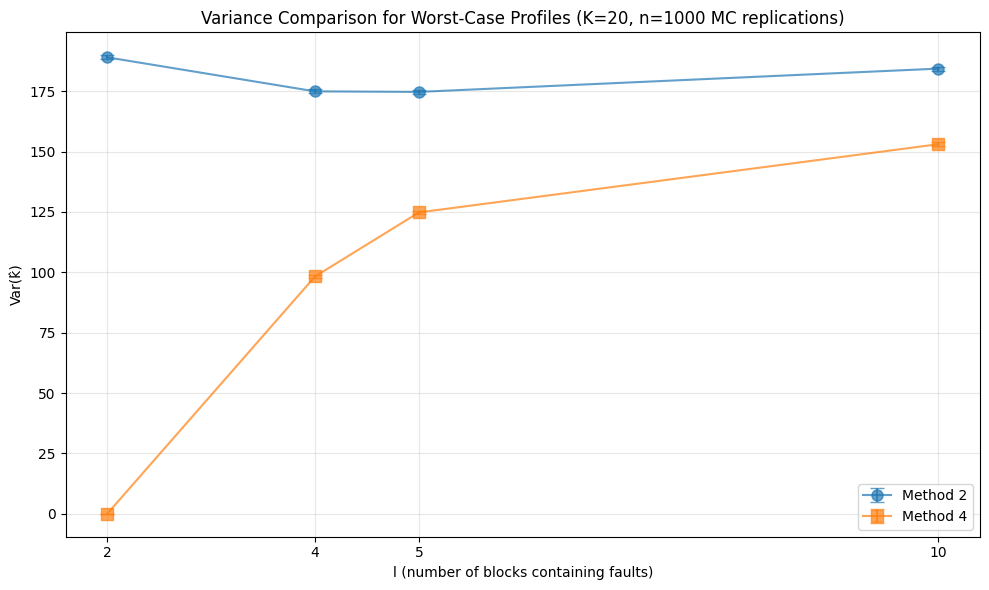


Variance Comparison (Worst-Case Profiles):
l     Var(k̂₂)     Var(k̂₄)     Ratio (Var₂/Var₄)
--------------------------------------------------
2     189.07       0.00         inf         
4     174.97       98.29        1.78        
5     174.74       124.82       1.40        
10    184.38       153.08       1.20        


In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, l in enumerate(l_values):
    ax = axes[idx]
    mc_reps = np.arange(1, mc_runs + 1)
    
    # Cumulative variance estimates
    k2_cum_var = [np.var(k2_ests_b[l][:i], ddof=1) for i in range(1, mc_runs + 1)]
    k4_cum_var = [np.var(k4_ests_b[l][:i], ddof=1) for i in range(1, mc_runs + 1)]
    
    ax.plot(mc_reps, k2_cum_var, label='Method 2', alpha=0.7)
    ax.plot(mc_reps, k4_cum_var, label='Method 4', alpha=0.7)
    ax.set_title(f'l={l} (K={K} faulty items in {l} blocks)')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Variance')
    
    # Set consistent limits
    ax.set_ylim(-10, 250)
    
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PLOT 2: Single plot with confidence intervals
plt.figure(figsize=(10, 6))

plt.errorbar(l_values, k2_variances_b, yerr=k2_ci_b, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=8)
plt.errorbar(l_values, k4_variances_b, yerr=k4_ci_b, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=8)

plt.xlabel('l (number of blocks containing faults)')
plt.ylabel('Var(k̂)')
plt.title(f'Variance Comparison for Worst-Case Profiles (K={K}, n={mc_runs} MC replications)')
plt.xticks(l_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nVariance Comparison (Worst-Case Profiles):")
print(f"{'l':<5} {'Var(k̂₂)':<12} {'Var(k̂₄)':<12} {'Ratio (Var₂/Var₄)':<12}")
print("-" * 50)
for i, l in enumerate(l_values):
    ratio = k2_variances_b[i] / k4_variances_b[i] if k4_variances_b[i] > 0 else float('inf')
    print(f"{l:<5} {k2_variances_b[i]:<12.2f} {k4_variances_b[i]:<12.2f} {ratio:<12.2f}")

### c) Random input, compare detection error

In [11]:
tau = 20
beta_values = [0.05, 0.1, 0.15, 0.2, 0.25]

R2 = {beta: [] for beta in beta_values} # dictionary to store results for each beta value
R4 = {beta: [] for beta in beta_values}


for beta in beta_values:
    FN2 = 0
    FP2 = 0
    FN4 = 0
    FP4 = 0
    for run in range(1, mc_runs + 1): # start from 1 to avoid division by zero when calculating probabilities
        random_k = np.random.choice(k_values) # randomly select a k value from the range of 15 to 25                CHANGE??
        line3 = np.zeros(n)
        line3[:random_k] = 1 # put in random_k faulty items
        np.random.shuffle(line3) # randomize order (same for both methods)


        # METHOD 2
        k2_est_c = method_2(line3, m)
        if k2_est_c <= tau and random_k >= (1 + beta) * tau:
            FN2 += 1 # add one and at end divide by mc_runs to get FN probability

        if k2_est_c > tau and random_k <= (1 - beta) * tau:
            FP2 += 1


        # METHOD 4
        k4_est_c = method_4(line3, m)
        if k4_est_c <= tau and random_k >= (1 + beta) * tau:
            FN4 += 1
        if k4_est_c > tau and random_k <= (1 - beta) * tau:
            FP4 += 1

        FN2_prob = FN2 / run
        FP2_prob = FP2 / run
        R2[beta].append(0.5 * (FN2_prob + FP2_prob)) # average of FN and FP probabilities

        FN4_prob = FN4 / run
        FP4_prob = FP4 / run
        R4[beta].append(0.5 * (FN4_prob + FP4_prob))

In [12]:
R2_final = [R2[beta][-1] for beta in beta_values]
R4_final = [R4[beta][-1] for beta in beta_values]

# Standard error for binomial proportion: sqrt(p(1-p)/n)
R2_std_errors = [np.sqrt(R2_final[i] * (1 - R2_final[i]) / mc_runs) for i in range(len(beta_values))]
R4_std_errors = [np.sqrt(R4_final[i] * (1 - R4_final[i]) / mc_runs) for i in range(len(beta_values))]

R2_ci = 1.96 * np.array(R2_std_errors)
R4_ci = 1.96 * np.array(R4_std_errors)


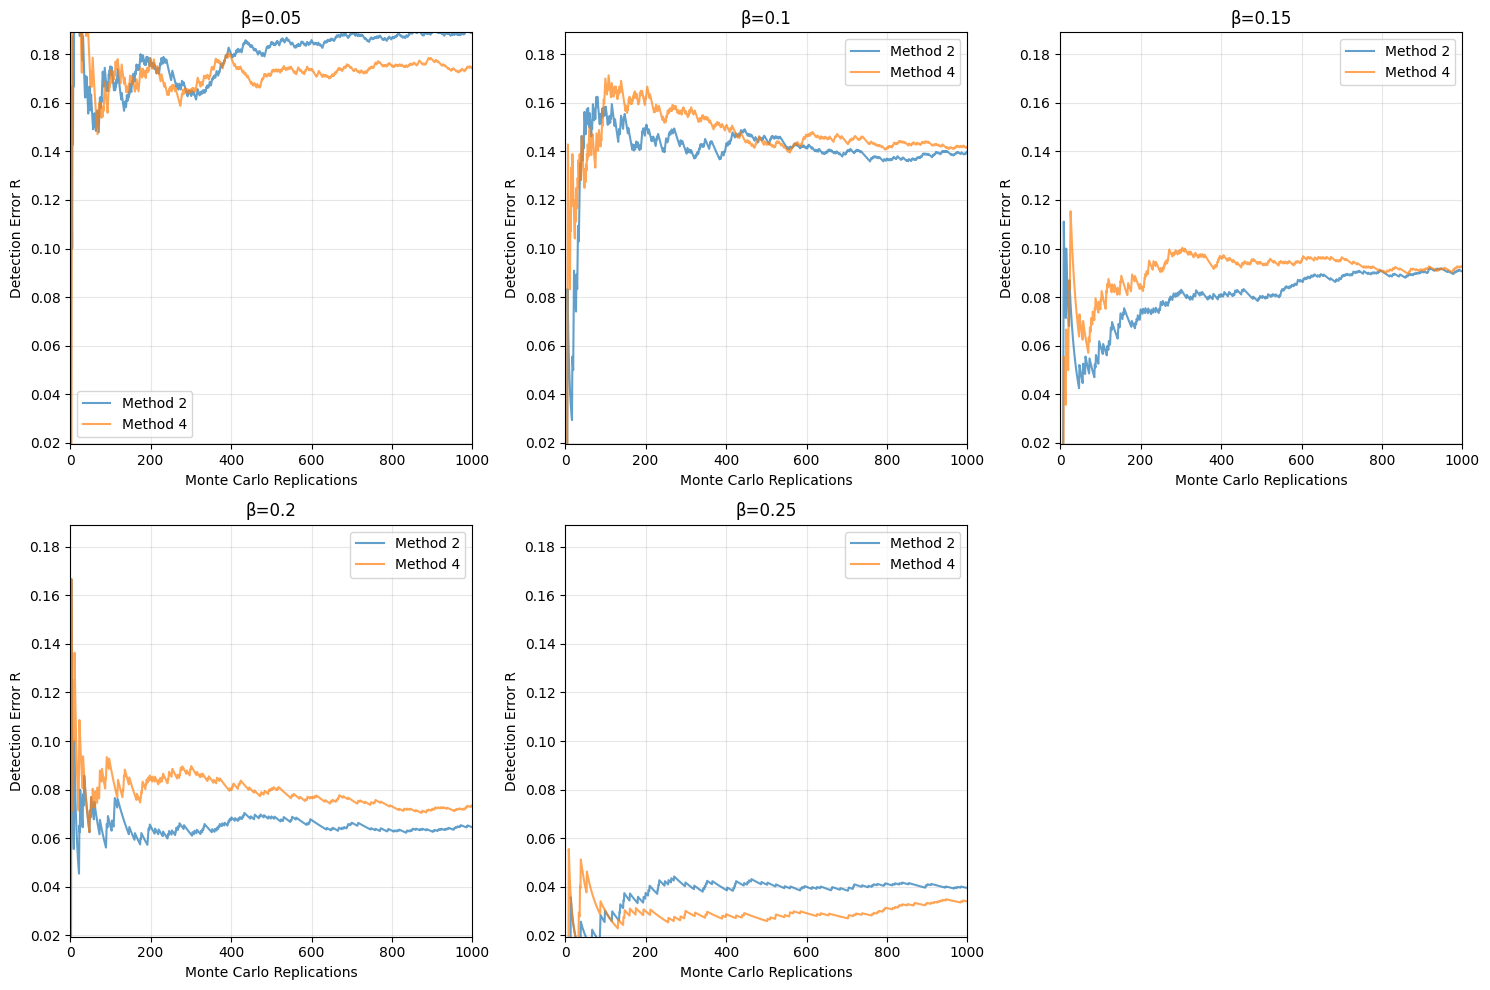

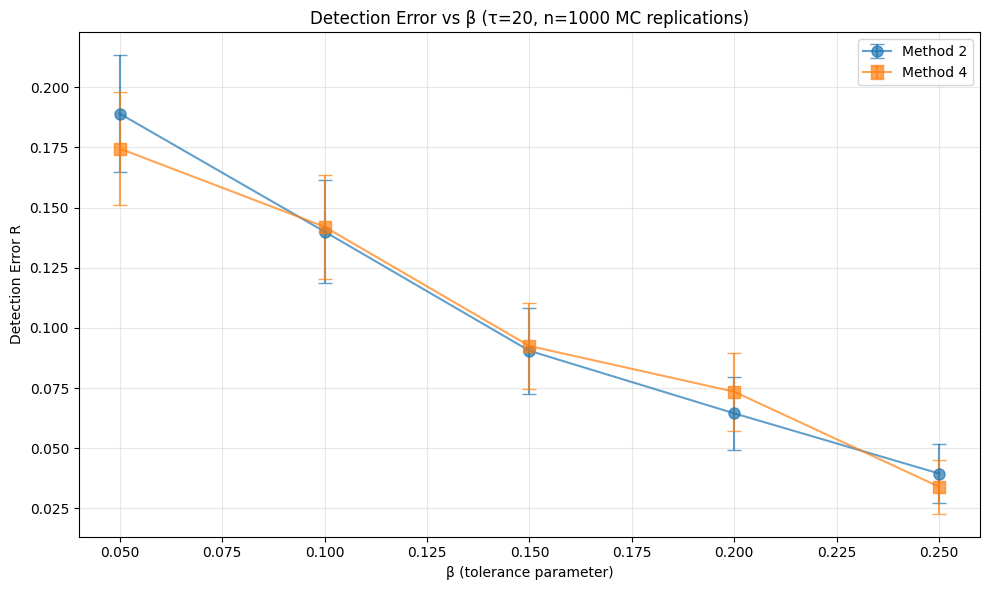


Detection Error Comparison:
β        R₂           R₄           Difference  
--------------------------------------------------
0.05     0.1890       0.1745       0.0145      
0.1      0.1400       0.1420       -0.0020     
0.15     0.0905       0.0925       -0.0020     
0.2      0.0645       0.0735       -0.0090     
0.25     0.0395       0.0340       0.0055      


In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Find global min/max for consistent scaling (removing outliers)
all_R_values = []
for beta in beta_values:
    all_R_values.extend(R2[beta])
    all_R_values.extend(R4[beta])

y_min = np.percentile(all_R_values, 1)
y_max = np.percentile(all_R_values, 99)

for idx, beta in enumerate(beta_values):
    ax = axes[idx]
    mc_reps = np.arange(1, mc_runs + 1)
    
    ax.plot(mc_reps, R2[beta], label='Method 2', alpha=0.7)
    ax.plot(mc_reps, R4[beta], label='Method 4', alpha=0.7)
    ax.set_title(f'β={beta}')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Detection Error R')
    ax.set_xlim(0, mc_runs)
    ax.set_ylim(y_min, y_max)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide the last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# PLOT 2: Final estimates vs β
plt.figure(figsize=(10, 6))

plt.errorbar(beta_values, R2_final, yerr=R2_ci, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=8)
plt.errorbar(beta_values, R4_final, yerr=R4_ci, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=8)

plt.xlabel('β (tolerance parameter)')
plt.ylabel('Detection Error R')
plt.title(f'Detection Error vs β (τ={tau}, n={mc_runs} MC replications)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nDetection Error Comparison:")
print(f"{'β':<8} {'R₂':<12} {'R₄':<12} {'Difference':<12}")
print("-" * 50)
for i, beta in enumerate(beta_values):
    diff = R2_final[i] - R4_final[i]
    print(f"{beta:<8} {R2_final[i]:<12.4f} {R4_final[i]:<12.4f} {diff:<12.4f}")

### d) Random input, compare detection error

In [61]:
R2_d = {l: [] for l in l_values} # dictionary to store results for each l value
R4_d = {l: [] for l in l_values}
beta_d = 0.1


for l in l_values:
    FN2_d = 0
    FP2_d = 0
    FN4_d = 0
    FP4_d = 0
    for run in range(1, mc_runs + 1): # start from 1 to avoid division by zero when calculating probabilities
        random_k = np.random.choice(k_values) # randomly select a k value from the range of 15 to 25                CHANGE??
        blocks4 = np.zeros((n//m, m))

        if random_k > 0:
            # Distribute random_k faults across ℓ blocks as evenly as possible
            faults_per_block = random_k // l
            extra_faults = random_k % l
            
            for i in range(l):
                if i < extra_faults:
                    blocks4[i, :min(faults_per_block + 1, m)] = 1
                else:
                    blocks4[i, :min(faults_per_block, m)] = 1
                    
        np.random.shuffle(blocks4) # shuffle order of blocks (same for both methods)

        line4 = blocks4.flatten() # flatten back to line format


        # METHOD 2
        k2_est_d = method_2(line4, m)
        if k2_est_d <= tau and random_k >= (1 + beta_d) * tau:
            FN2_d += 1 # add one and at end divide by mc_runs to get FN probability

        if k2_est_d > tau and random_k <= (1 - beta_d) * tau:
            FP2_d += 1


        # METHOD 4
        k4_est_d = method_4(line4, m)
        if k4_est_d <= tau and random_k >= (1 + beta_d) * tau:
            FN4_d += 1
        if k4_est_d > tau and random_k <= (1 - beta_d) * tau:
            FP4_d += 1


        FN2_prob = FN2_d / run
        FP2_prob = FP2_d / run
        R2_d[l].append(0.5 * (FN2_prob + FP2_prob)) # average of FN and FP probabilities

        FN4_prob = FN4_d / run
        FP4_prob = FP4_d / run
        R4_d[l].append(0.5 * (FN4_prob + FP4_prob))

In [62]:
R2_d_final = [R2_d[l][-1] for l in l_values]
R4_d_final = [R4_d[l][-1] for l in l_values]

# Standard error for binomial proportion: sqrt(p(1-p)/n)
R2_d_std_errors = [np.sqrt(max(0.0001, R2_d_final[i] * (1 - R2_d_final[i]) / mc_runs)) for i in range(len(l_values))]
R4_d_std_errors = [np.sqrt(max(0.0001, R4_d_final[i] * (1 - R4_d_final[i]) / mc_runs)) for i in range(len(l_values))]

R2_d_ci = 1.96 * np.array(R2_d_std_errors)
R4_d_ci = 1.96 * np.array(R4_d_std_errors)

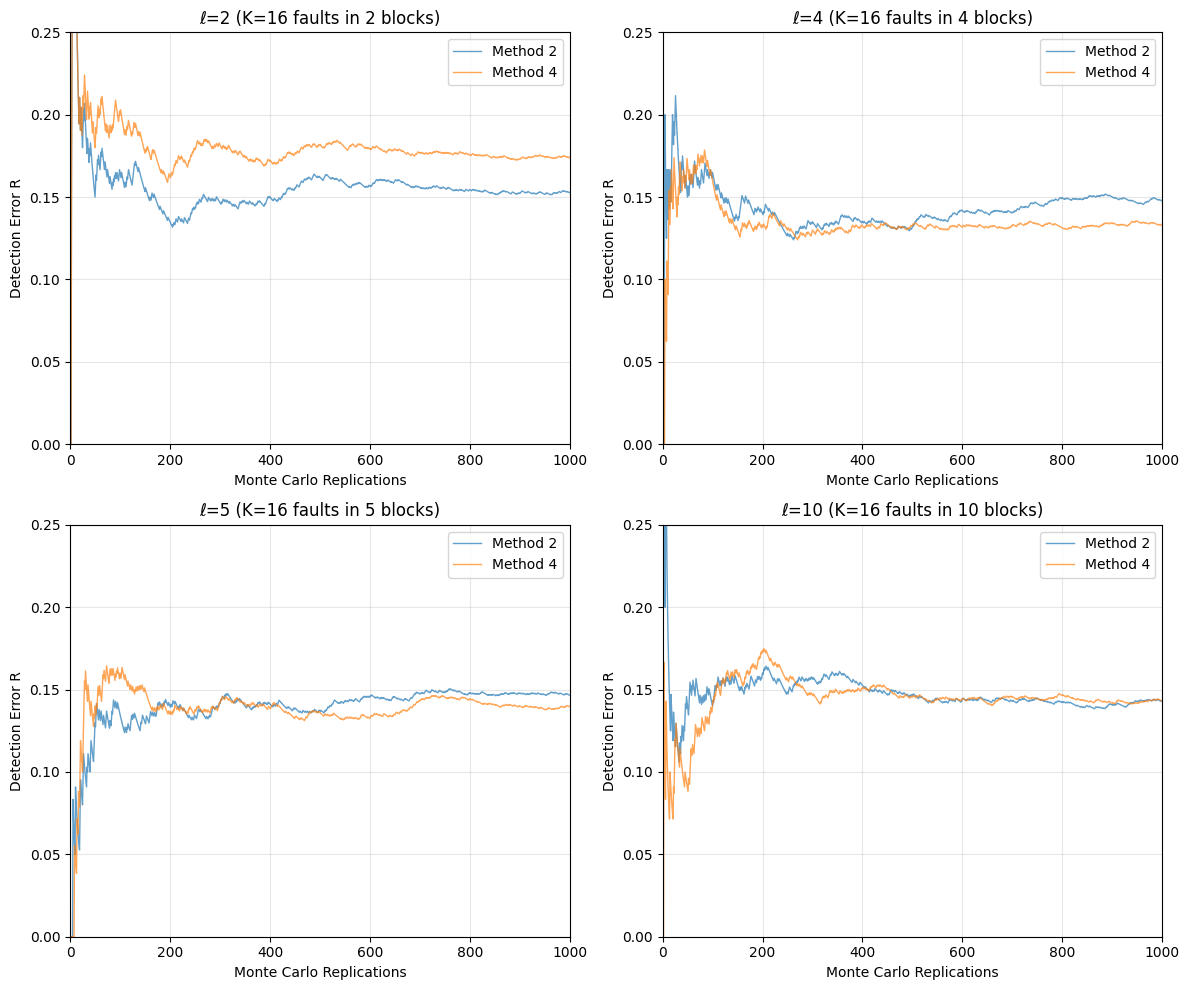

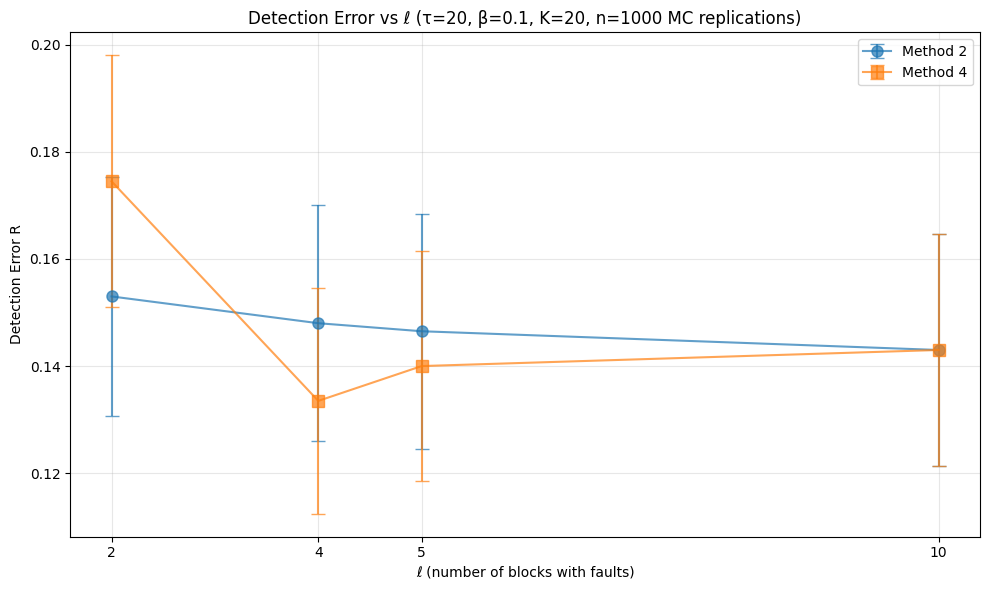


Detection Error Comparison (Worst-Case-ℓ):
ℓ        R₂           R₄           Difference  
--------------------------------------------------
2        0.1530       0.1745       -0.0215     
4        0.1480       0.1335       0.0145      
5        0.1465       0.1400       0.0065      
10       0.1430       0.1430       0.0000      


In [64]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Find global min/max for consistent scaling (removing outliers)
all_R_d_values = []
for l in l_values:
    all_R_d_values.extend(R2_d[l])
    all_R_d_values.extend(R4_d[l])

#y_min_d = max(0, np.percentile(all_R_d_values, 1))
#y_max_d = min(1, np.percentile(all_R_d_values, 99))

for idx, l in enumerate(l_values):
    ax = axes[idx]
    mc_reps = np.arange(1, mc_runs + 1)
    
    ax.plot(mc_reps, R2_d[l], label='Method 2', alpha=0.7, linewidth=1)
    ax.plot(mc_reps, R4_d[l], label='Method 4', alpha=0.7, linewidth=1)
    ax.set_title(f'ℓ={l} (K={random_k} faults in {l} blocks)')
    ax.set_xlabel('Monte Carlo Replications')
    ax.set_ylabel('Detection Error R')
    ax.set_xlim(0, mc_runs)
    ax.set_ylim(0, 0.25)
    ax.legend()
    ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# PLOT 2: Final estimates vs ℓ
plt.figure(figsize=(10, 6))

plt.errorbar(l_values, R2_d_final, yerr=R2_d_ci, marker='o', label='Method 2', 
             capsize=5, alpha=0.7, markersize=8)
plt.errorbar(l_values, R4_d_final, yerr=R4_d_ci, marker='s', label='Method 4', 
             capsize=5, alpha=0.7, markersize=8)

plt.xlabel('ℓ (number of blocks with faults)')
plt.ylabel('Detection Error R')
plt.title(f'Detection Error vs ℓ (τ={tau}, β={beta_d}, K={K}, n={mc_runs} MC replications)')
plt.xticks(l_values)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nDetection Error Comparison (Worst-Case-ℓ):")
print(f"{'ℓ':<8} {'R₂':<12} {'R₄':<12} {'Difference':<12}")
print("-" * 50)
for i, l in enumerate(l_values):
    diff = R2_d_final[i] - R4_d_final[i]
    print(f"{l:<8} {R2_d_final[i]:<12.4f} {R4_d_final[i]:<12.4f} {diff:<12.4f}")

### e)
When considering the variances of the estimators, method 4 consistently has lower variances in both the random and worst case inputs compared to method 2. In fact, in the worst case scenario with $l=2$, there is 0 variance for method 4. \
However, when comparing the detection error, both of the methods actually seem quite comparable. For random input, method 4 is consistently slightly better, but for the worst case input it is more balanced.

# Problem 5

In [ ]:
n = 100
m = 10
tau = 20
beta = 0.1
t_values = np.arange(0, 500)
prod_line = np.zeros(500)
for i in range(10, 200, 10):
    prod_line[i] = 1 # every 10th item for first 200
for i in range(204, 500, 4):
    prod_line[i] = 1 # every 4th item for last 300

m2_inspections = np.zeros(500)
for i in range(len(m2_inspections)):
    rand_num = random.random()
    if rand_num < 1/m: # check with probability 1/m
        m2_inspections[i] = 1

m4_inspections = np.zeros(500)
for i in range(0, len(m4_inspections), m): # iterate by blocks of size m
    rand_int = random.randint(0, m-1) # choose one item from the block at random
    m4_inspections[i + rand_int] = 1




k2 = {t: 0 for t in t_values}
k4 = {t: 0 for t in t_values}
m2_detections = {t: 0 for t in t_values}
m4_detections = {t: 0 for t in t_values}
m2_time = 0
m4_time = 0

for t in t_values:
    k2[t] = np.sum(prod_line[t:t+n] * m2_inspections[t:t+n]) * m # contribute to sum if both are 1
    k4[t] = np.sum(prod_line[t:t+n] * m4_inspections[t:t+n]) * m # contribute to sum if both are 1

    if k2[t] > tau:
        m2_detections[t] = 1 # PROBLEM
        
    if k4[t] > tau:
        m4_detections[t] = 1 # PROBLEM
        

m2_time = next((key for key in sorted(m2_detections.keys()) if m2_detections[key] == 1 and key >= 199), None)
m4_time = next((key for key in sorted(m4_detections.keys()) if m4_detections[key] == 1 and key >= 199), None)

print(f"Method 2 detects at time: {m2_time}")
print(f"Method 4 detects at time: {m4_time}")

Method 2 detects at time: 249
Method 4 detects at time: 229


In [20]:
def simulate_detection(n=100, m=10, tau=20):
    """
    Simulate one run of the detection experiment.
    Returns: (m2_detection_time, m4_detection_time, k2_estimates, k4_estimates, m2_flags, m4_flags)
    """
    # Create production line
    prod_line = np.zeros(500)
    for i in range(10, 200, 10):
        prod_line[i] = 1  # every 10th item for first 200
    for i in range(204, 500, 4):
        prod_line[i] = 1  # every 4th item for last 300
    
    # Method 2 inspections: each item with probability 1/m
    m2_inspections = np.zeros(500)
    for i in range(len(m2_inspections)):
        if random.random() < 1/m:
            m2_inspections[i] = 1
    
    # Method 4 inspections: one random item per block
    m4_inspections = np.zeros(500)
    for i in range(0, len(m4_inspections), m):
        rand_int = random.randint(0, m-1)
        m4_inspections[i + rand_int] = 1
    
    # Compute estimates and detections for all t
    t_values = np.arange(n-1, 500)
    k2_estimates = {}
    k4_estimates = {}
    m2_flags = {}
    m4_flags = {}
    
    m2_detection_time = None
    m4_detection_time = None
    
    for t in t_values:
        if t + n > 500:
            break
            
        # Calculate estimates
        k2_estimates[t] = np.sum(prod_line[t-n+1:t+1] * m2_inspections[t-n+1:t+1]) * m
        k4_estimates[t] = np.sum(prod_line[t-n+1:t+1] * m4_inspections[t-n+1:t+1]) * m
        
        # Check if PROBLEM detected
        m2_flags[t] = 1 if k2_estimates[t] > tau else 0
        m4_flags[t] = 1 if k4_estimates[t] > tau else 0
        
        # Find first detection after change (t >= 200)
        if t >= 200:
            if m2_detection_time is None and m2_flags[t] == 1:
                m2_detection_time = t
            if m4_detection_time is None and m4_flags[t] == 1:
                m4_detection_time = t
    
    return m2_detection_time, m4_detection_time, k2_estimates, k4_estimates, m2_flags, m4_flags



Running single simulation for visualization...


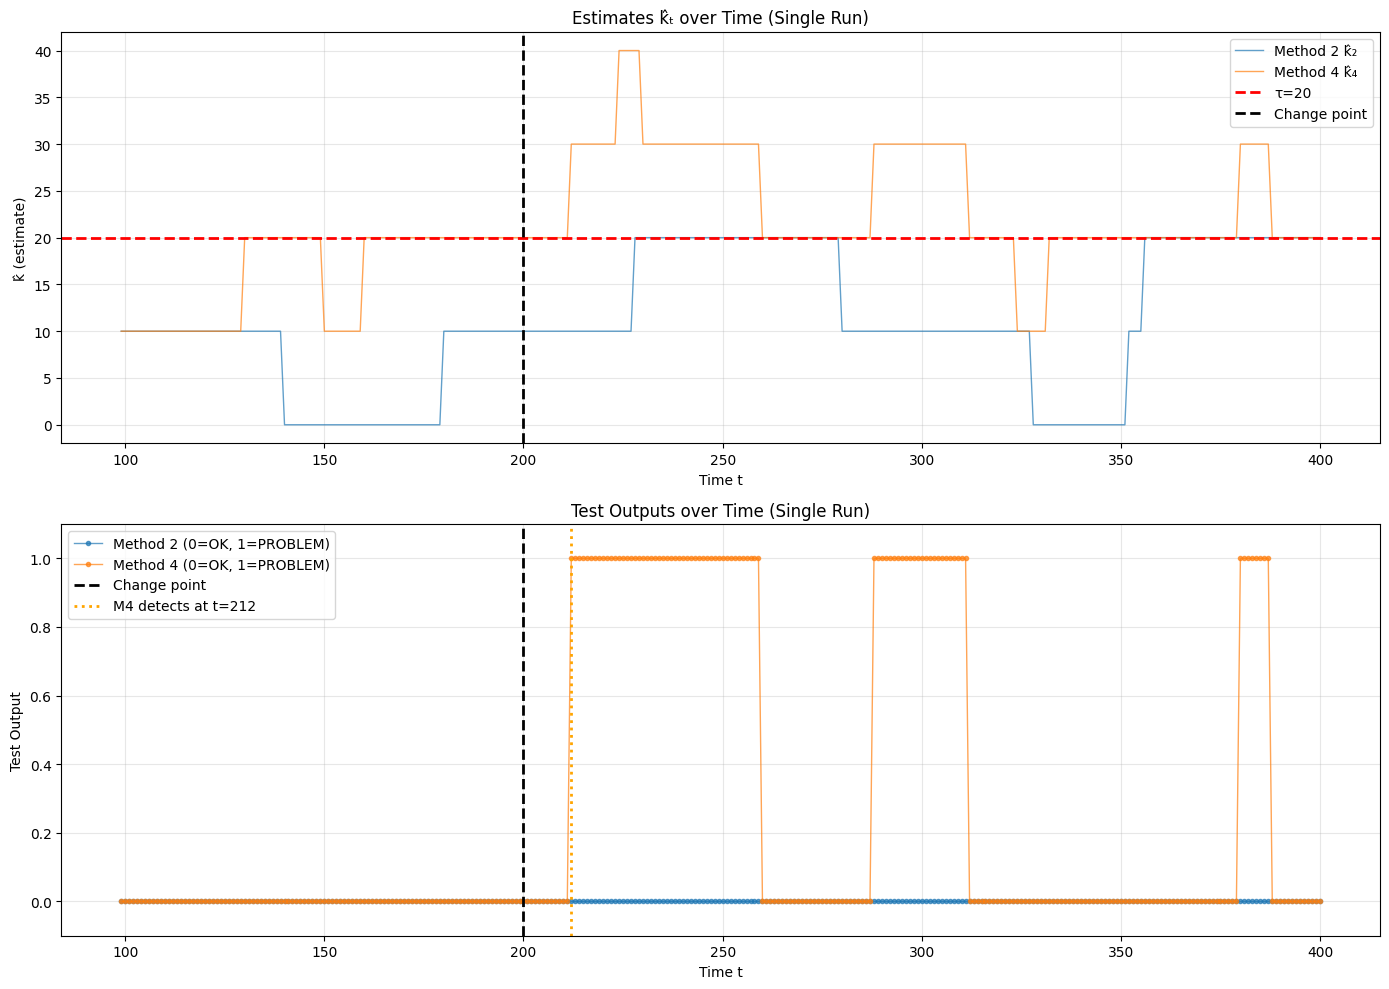

Method 2 detected at t=None
Method 4 detected at t=212


In [26]:
# PART 1: Single MC run visualization
print("Running single simulation for visualization...")
m2_time, m4_time, k2_est, k4_est, m2_flag, m4_flag = simulate_detection()

t_plot = sorted(k2_est.keys())
k2_vals = [k2_est[t] for t in t_plot]
k4_vals = [k4_est[t] for t in t_plot]
m2_vals = [m2_flag[t] for t in t_plot]
m4_vals = [m4_flag[t] for t in t_plot]

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot k̂ estimates
axes[0].plot(t_plot, k2_vals, label='Method 2 k̂₂', alpha=0.7, linewidth=1)
axes[0].plot(t_plot, k4_vals, label='Method 4 k̂₄', alpha=0.7, linewidth=1)
axes[0].axhline(y=tau, color='red', linestyle='--', label=f'τ={tau}', linewidth=2)
axes[0].axvline(x=200, color='black', linestyle='--', label='Change point', linewidth=2)
axes[0].set_xlabel('Time t')
axes[0].set_ylabel('k̂ (estimate)')
axes[0].set_title('Estimates k̂ₜ over Time (Single Run)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot test outputs (0=OK, 1=PROBLEM)
axes[1].plot(t_plot, m2_vals, label='Method 2 (0=OK, 1=PROBLEM)', alpha=0.7, linewidth=1, marker='.')
axes[1].plot(t_plot, m4_vals, label='Method 4 (0=OK, 1=PROBLEM)', alpha=0.7, linewidth=1, marker='.')
axes[1].axvline(x=200, color='black', linestyle='--', label='Change point', linewidth=2)
if m2_time is not None:
    axes[1].axvline(x=m2_time, color='blue', linestyle=':', label=f'M2 detects at t={m2_time}', linewidth=2)
if m4_time is not None:
    axes[1].axvline(x=m4_time, color='orange', linestyle=':', label=f'M4 detects at t={m4_time}', linewidth=2)
axes[1].set_xlabel('Time t')
axes[1].set_ylabel('Test Output')
axes[1].set_title('Test Outputs over Time (Single Run)')
axes[1].set_ylim(-0.1, 1.1)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Method 2 detected at t={m2_time}")
print(f"Method 4 detected at t={m4_time}")


Running Monte Carlo simulation...
Completed 500/5000 runs
Completed 1000/5000 runs
Completed 1500/5000 runs
Completed 2000/5000 runs
Completed 2500/5000 runs
Completed 3000/5000 runs
Completed 3500/5000 runs
Completed 4000/5000 runs
Completed 4500/5000 runs
Completed 5000/5000 runs


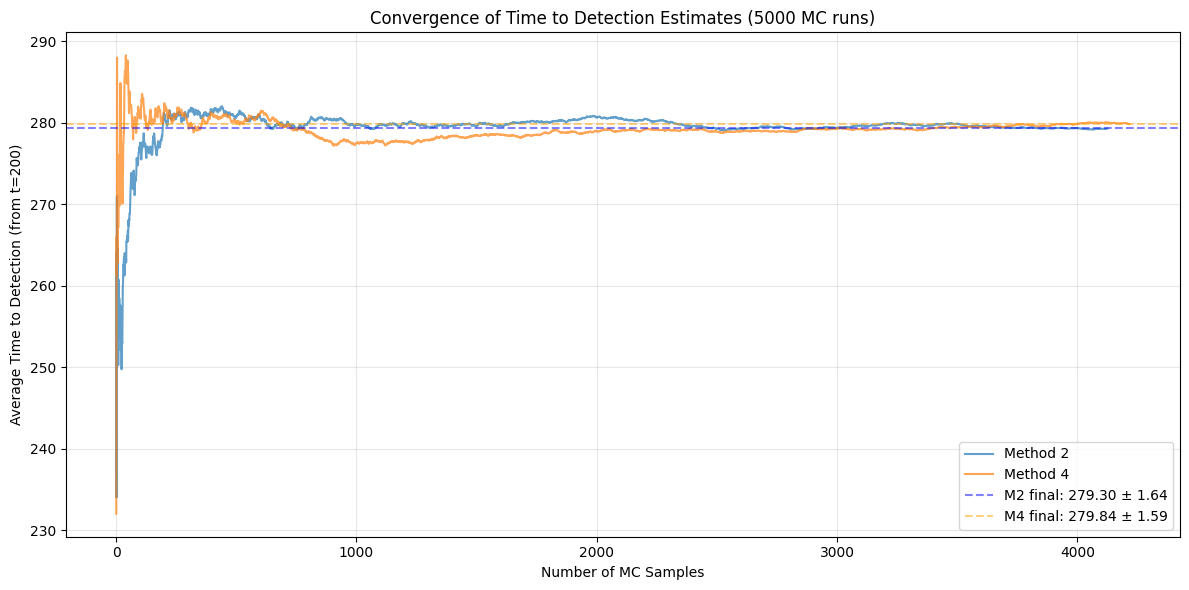

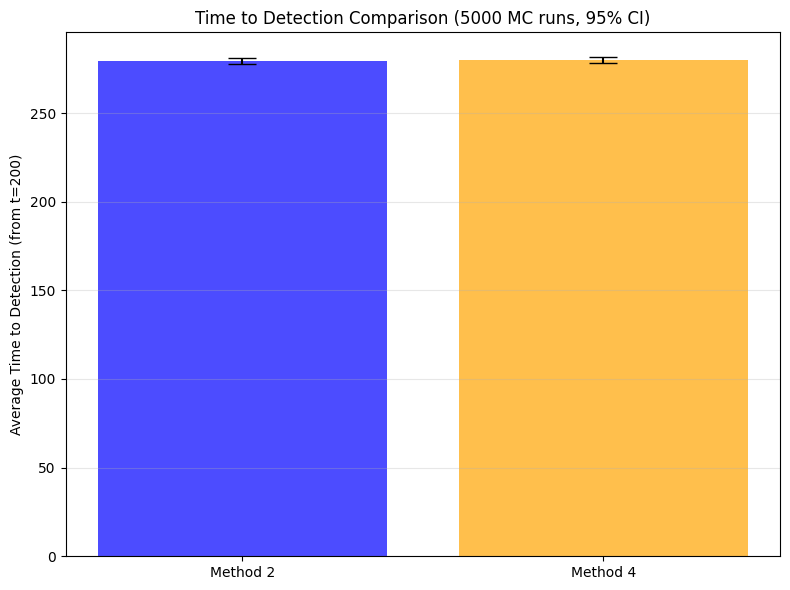


SUMMARY STATISTICS
Method 2:
  Average time to detection: 279.30
  95% CI: ±1.64
  Detection rate: 4124/5000 (82.5%)

Method 4:
  Average time to detection: 279.84
  95% CI: ±1.59
  Detection rate: 4216/5000 (84.3%)

Difference: 0.54 time units


In [31]:
# PART 2: Monte Carlo to estimate time to detection
print("\nRunning Monte Carlo simulation...")
mc_runs = 5000

m2_detection_times = []
m4_detection_times = []

for run in range(mc_runs):
    m2_t, m4_t, _, _, _, _ = simulate_detection()
    
    # Only include runs where detection actually occurred
    if m2_t is not None:
        m2_detection_times.append(m2_t)
    if m4_t is not None:
        m4_detection_times.append(m4_t)
    
    if (run + 1) % 500 == 0:
        print(f"Completed {run + 1}/{mc_runs} runs")

# Calculate cumulative averages for convergence plot
m2_cumulative_avg = []
m4_cumulative_avg = []

for i in range(1, len(m2_detection_times) + 1):
    m2_cumulative_avg.append(np.mean(m2_detection_times[:i]))

for i in range(1, len(m4_detection_times) + 1):
    m4_cumulative_avg.append(np.mean(m4_detection_times[:i]))

# Final estimates
m2_avg = np.mean(m2_detection_times) if m2_detection_times else None
m4_avg = np.mean(m4_detection_times) if m4_detection_times else None

m2_std_error = np.std(m2_detection_times, ddof=1) / np.sqrt(len(m2_detection_times)) if m2_detection_times else 0
m4_std_error = np.std(m4_detection_times, ddof=1) / np.sqrt(len(m4_detection_times)) if m4_detection_times else 0

m2_ci = 1.96 * m2_std_error
m4_ci = 1.96 * m4_std_error

# PLOT: Convergence of time to detection estimates
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(m2_cumulative_avg) + 1), m2_cumulative_avg, 
         label='Method 2', alpha=0.7, linewidth=1.5)
plt.plot(range(1, len(m4_cumulative_avg) + 1), m4_cumulative_avg, 
         label='Method 4', alpha=0.7, linewidth=1.5)

plt.axhline(y=m2_avg, color='blue', linestyle='--', alpha=0.5, 
            label=f'M2 final: {m2_avg:.2f} ± {m2_ci:.2f}')
plt.axhline(y=m4_avg, color='orange', linestyle='--', alpha=0.5, 
            label=f'M4 final: {m4_avg:.2f} ± {m4_ci:.2f}')

plt.xlabel('Number of MC Samples')
plt.ylabel('Average Time to Detection (from t=200)')
plt.title(f'Convergence of Time to Detection Estimates ({mc_runs} MC runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# PLOT: Bar chart comparison with confidence intervals
plt.figure(figsize=(8, 6))

methods = ['Method 2', 'Method 4']
avgs = [m2_avg, m4_avg]
cis = [m2_ci, m4_ci]

x_pos = np.arange(len(methods))
plt.bar(x_pos, avgs, yerr=cis, capsize=10, alpha=0.7, color=['blue', 'orange'])
plt.xticks(x_pos, methods)
plt.ylabel('Average Time to Detection (from t=200)')
plt.title(f'Time to Detection Comparison ({mc_runs} MC runs, 95% CI)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Method 2:")
print(f"  Average time to detection: {m2_avg:.2f}")
print(f"  95% CI: ±{m2_ci:.2f}")
print(f"  Detection rate: {len(m2_detection_times)}/{mc_runs} ({100*len(m2_detection_times)/mc_runs:.1f}%)")
print(f"\nMethod 4:")
print(f"  Average time to detection: {m4_avg:.2f}")
print(f"  95% CI: ±{m4_ci:.2f}")
print(f"  Detection rate: {len(m4_detection_times)}/{mc_runs} ({100*len(m4_detection_times)/mc_runs:.1f}%)")
print(f"\nDifference: {abs(m2_avg - m4_avg):.2f} time units")
print("="*60)

The two methods in this experiment yield very comparable results, differing only slightly in time to detection. At first this seemed strange, but upon remembering that this case is the worst case scenario (even spacing), it is exactly the type of situation where we would expect method 4 to do worse than normal. It cannot rely on faults happening in blocks and aiming to catch one. This reiterates the behavior of problem 4 parts c and d, where the detection error of the two methods are very close as well, despite method 4 having lower variance as shown in the first parts.